In [3]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from nltk.stem import SnowballStemmer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, Embedding, Bidirectional, GRU, Conv1D, GlobalMaxPooling1D, Dropout, TimeDistributed
from keras.layers.merge import concatenate
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from flask import Flask, jsonify, make_response, request
import threading
%matplotlib inline

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from statistics import mean
from sklearn.metrics import hamming_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

from sklearn.metrics import roc_auc_score, confusion_matrix
import statistics
from sklearn.metrics import recall_score

from wordcloud import WordCloud
from collections import Counter

from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import sys, os, re, csv, codecs, numpy as np, pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, GRU, Embedding, Dropout, Activation,Bidirectional, GlobalMaxPool1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

from sklearn.model_selection import train_test_split

In [23]:
import os

os.mkdir('templates')
os.mkdir('static')

FileExistsError: ignored

In [6]:
import socket
print(socket.gethostbyname(socket.gethostname()))

172.28.0.2


In [7]:
pp = Flask(__name__)
padding_size = 1000

In [8]:
MAX_SEQUENCE_LENGTH = 100
MAX_NB_WORDS = 100000
EMBEDDING_DIM = 50

In [9]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df_train = pd.read_csv("/content/drive/My Drive/train2.csv")
df_test = pd.read_csv("/content/drive/My Drive/test (2).csv")

df_submission = pd.read_csv("/content/drive/My Drive/sample_submission.csv")


# Data Preprocessing and Exploratory Data Analyasis


In [70]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [13]:
train = df_train.copy()
toxic = train[train['toxic'] == 1]
severe_toxic = train[train['severe_toxic'] == 1]
obscene = train[train['obscene']==1]
threat = train[train['threat'] == 1]
insult = train[train['insult'] == 1]
identity_hate = train[train['identity_hate'] == 1]

In [72]:
toxic.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [15]:
#Let's get the toxic and non toxic comments
toxic1=df_train[df_train["toxic"]==1]["comment_text"]
non_toxic=df_train[df_train["toxic"]==0]["comment_text"]

#converting them to lists
#taking 10k of both classes randomly:
toxic1=list(toxic1)
non_toxic=list(non_toxic)

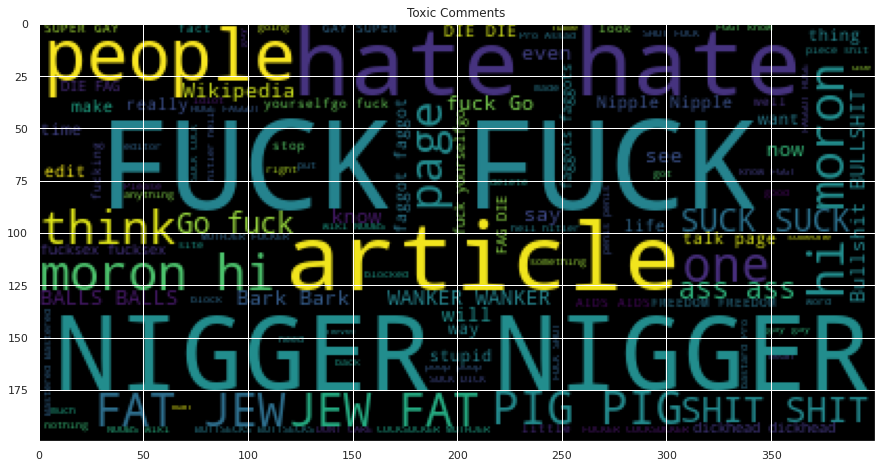

In [73]:
sent = toxic['comment_text'].tolist()
sent_joined = ''.join(sent)
plt.figure(figsize=(15,15))
plt.title("Toxic Comments")
plt.imshow(WordCloud().generate(sent_joined))

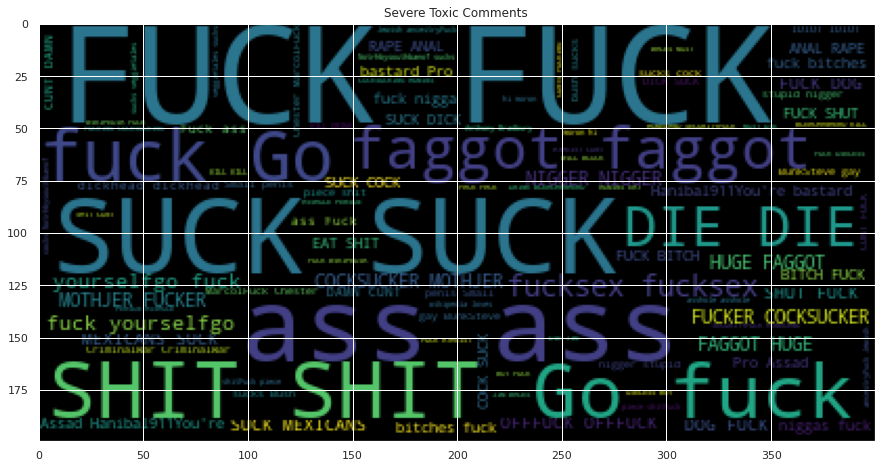

In [74]:
sent = severe_toxic['comment_text'].tolist()
sent_joined = ''.join(sent)
plt.figure(figsize=(15,15))
plt.title("Severe Toxic Comments")
plt.imshow(WordCloud().generate(sent_joined))

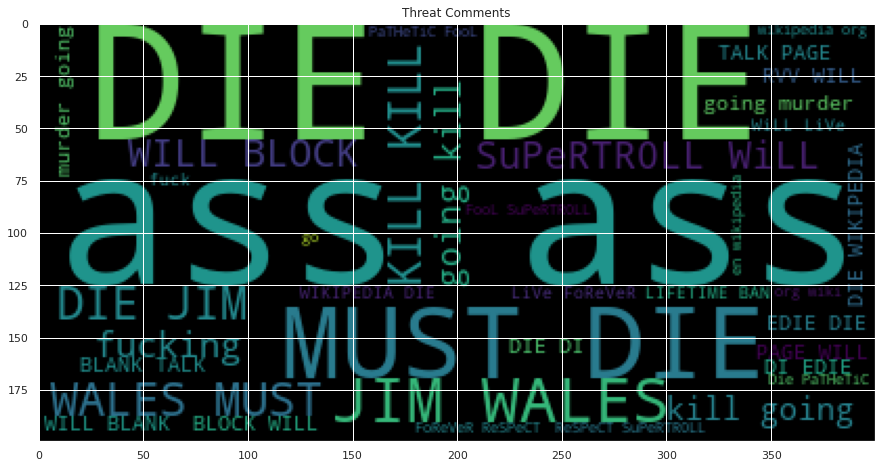

In [75]:
sent = threat['comment_text'].tolist()
sent_joined = ''.join(sent)
plt.figure(figsize=(15,15))
plt.title("Threat Comments")
plt.imshow(WordCloud().generate(sent_joined))

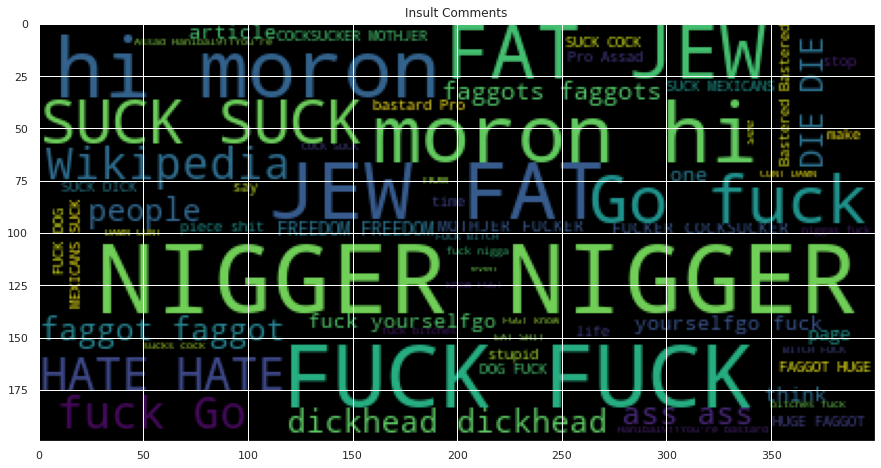

In [76]:
sent = insult['comment_text'].tolist()
sent_joined = ''.join(sent)
plt.figure(figsize=(15,15))
plt.title("Insult Comments")
plt.imshow(WordCloud().generate(sent_joined))

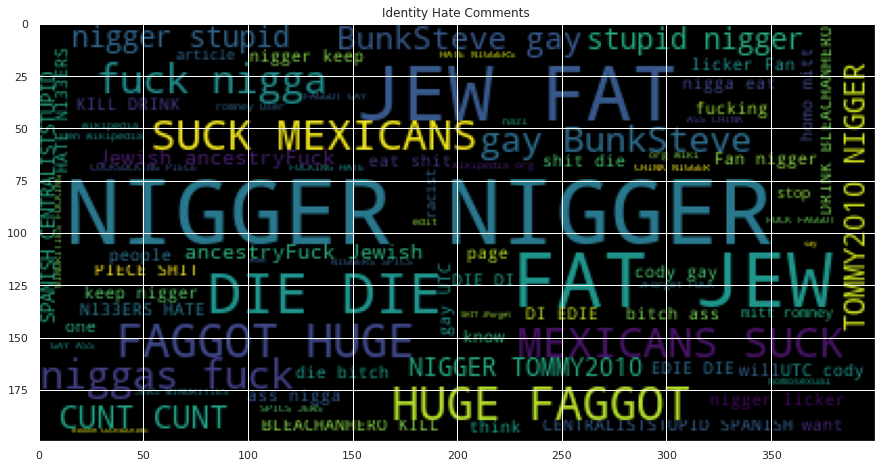

In [77]:
sent = identity_hate['comment_text'].tolist()
sent_joined = ''.join(sent)
plt.figure(figsize=(15,15))
plt.title("Identity Hate Comments")
plt.imshow(WordCloud().generate(sent_joined))

In [21]:

toxic_ = (toxic.shape[0]/train.shape[0])*100
severe_toxic_ = (severe_toxic.shape[0]/train.shape[0])*100
obscene_ = (obscene.shape[0]/train.shape[0])*100
threat_ = (threat.shape[0]/train.shape[0])*100
insult_ = (insult.shape[0]/train.shape[0])*100
identity_hate_ = (identity_hate.shape[0]/train.shape[0])*100

In [22]:
print(toxic_,severe_toxic_,obscene_,threat_,insult_,identity_hate_)

9.584448302009765 0.9995550569965721 5.2948217407925 0.2995531769557125 4.936360616904074 0.8804858025581089


###  label toxic has the most observations in the training dataset while threat has the least.

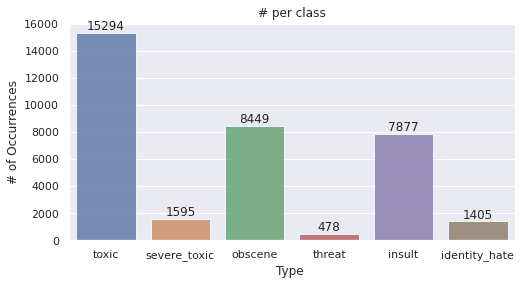

In [78]:
x = train.iloc[:,2:].sum()

plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

## Correlations of labels

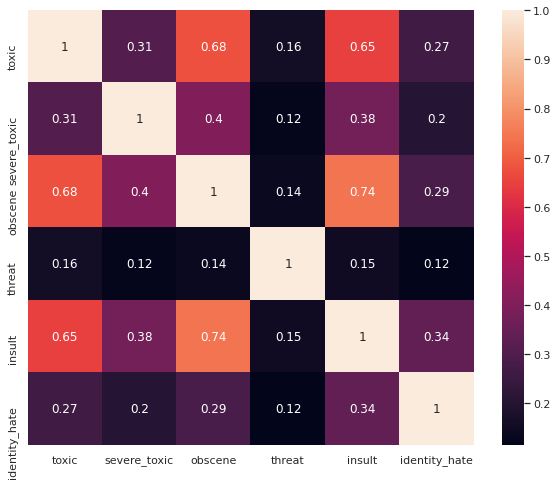

In [79]:
corr=train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

the cross-correlation matrix we ntoice that there is a high chance of obscene comments to be insulting.


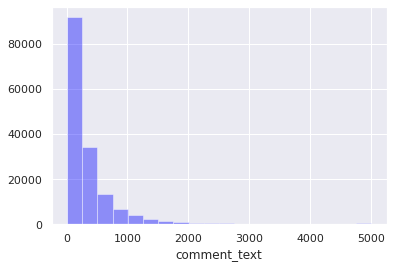

In [80]:

sns.set(color_codes=True)
comment_len = train.comment_text.str.len()
sns.distplot(comment_len, kde=False, bins=20, color="blue")

most of the comments are short with only a few comments longer than 1000 words.

# Feature Engineering¶
Before training models, we need to break down the sentence into unique words by tokenizing the comments. with tokenize() , i removed punctuations and special characters and filtered out Non-ASCII characters.

In [26]:

train_data = df_train['comment_text']
test_data = df_test['comment_text']
all_data = pd.concat([train_data, test_data])

In [27]:
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [28]:
def run_classifier(data, features,  diff_columns, clf):
    kdict = {}
    kdict['class'] = []
    kdict['score_mean'] = []
    kdict['score_std'] = []
    kdict['scores'] = []

    for i in diff_columns:
        labels = data[i]
        res = cross_val_score(clf, features, labels, cv=10, scoring='roc_auc')

        kdict['class'].append(i)
        kdict['score_mean'].append(np.mean(res))
        kdict['score_std'].append(np.std(res))
        kdict['scores'].append(res)

    return pd.DataFrame.from_dict(kdict)

In [29]:
EMBEDDING_FILE='/content/drive/My Drive/glove.6B.50d.txt'

embed_size = 50 # how big is each word vector
max_features = 20000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 100 # max number of words in a comment to use

In [30]:
df_train = pd.read_csv("/content/drive/My Drive/train2.csv")
df_test = pd.read_csv("/content/drive/My Drive/test (2).csv")

list_sentences_train = df_train["comment_text"].fillna("_na_").values
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = df_train[list_classes].values
list_sentences_test = df_test["comment_text"].fillna("_na_").values

In [31]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_t, y, test_size=.2, shuffle=True)

In [33]:
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.strip().split()) for o in open(EMBEDDING_FILE))

In [34]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
emb_mean,emb_std

(0.020940498, 0.6441043)

In [35]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [36]:
inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
x = Bidirectional(GRU(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
x = GlobalMaxPool1D()(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [37]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 50)           1000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 100)          30600     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                

In [38]:
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/2
3990/3990 [==============================] - 2822s 707ms/step - loss: 0.0815 - accuracy: 0.8521 - val_loss: 0.0603 - val_accuracy: 0.9947
Epoch 2/2
3990/3990 [==============================] - 2781s 697ms/step - loss: 0.0587 - accuracy: 0.9615 - val_loss: 0.0554 - val_accuracy: 0.9946


In [39]:
test_example = non_toxic[18000]



In [40]:
#tokenizer.fit_on_texts(list(list_sentences_train))
x_test_ex = tokenizer.texts_to_sequences([test_example])
x_test_ex = pad_sequences(x_test_ex, maxlen=maxlen, padding='post')
print(x_test_ex)
print(test_example)

[[  337  1533    22     7    24   356    10    54   110    10     1   240
     83    45    33    14  1395     2   360    29  3139     7  3485    12
     29  1034    11   298  1718     2    35     9     6    99  4980    79
      5   283   802     3   276     7    87    14   150     1    71   511
     26   266 10020   157  1331     7    44   579     2    14    33    13
    125    94    38  3428   815  2148   740   971   625   182     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]]
"

 Re:Sassanid Empire 

If I was ever in any way in the wrong, then please do not hesitate to revert my reversion. I apologise for my mistake. It simply appeared to me that you had pulled out a great deal of text. I did not read the edit summary, but rather rolled-back immediately. I will remember to not do this again. Thanks,  Talk   (dated 23:42, 16 June 2007 UTC)"


In [81]:
preds = model.predict(x_test_ex)
print(preds)
print(np.argmax(preds))

[[1.8018305e-03 5.2573855e-06 4.4545063e-04 1.2579552e-05 2.6076857e-04
  4.2328877e-05]]
0


In [42]:
model.evaluate(x_test, y_test)

998/998 [==============================] - 59s 59ms/step - loss: 0.0554 - accuracy: 0.9946


[0.05536922439932823, 0.9946420192718506]

In [43]:
ypred = model.predict(X_te)

In [83]:
df_submission = pd.read_csv("/content/drive/My Drive/sample_submission.csv")
df_submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [82]:
df_submission['toxic'] = ypred[:,0]
df_submission['severe_toxic'] = ypred[:,1]
df_submission['obscene'] = ypred[:,2]
df_submission['threat'] = ypred[:,3]
df_submission['insult'] = ypred[:,4]
df_submission['identity_hate'] = ypred[:,5]
df_submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.927806,0.220305,0.840082,0.058835,0.760245,0.204213
1,0000247867823ef7,0.005042,0.000040,0.001467,0.000096,0.001022,0.000225
2,00013b17ad220c46,0.005786,0.000115,0.002111,0.000438,0.001831,0.000531
3,00017563c3f7919a,0.001827,0.000007,0.000442,0.000025,0.000312,0.000057
4,00017695ad8997eb,0.004438,0.000047,0.001339,0.000166,0.000985,0.000267


In [46]:
!pip install jupyter-dash

     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 1.0MB 33.6MB/s 
     |████████████████████████████████| 3.5MB 52.0MB/s 
     |████████████████████████████████| 194kB 53.2MB/s 
     |████████████████████████████████| 1.8MB 41.3MB/s 
     |████████████████████████████████| 358kB 52.1MB/s 
  Created wheel for dash: filename=dash-1.18.1-cp36-none-any.whl size=83681 sha256=e441659dcc4d724dcdf5083e1aa8c4132b96acd561a281f3af092f867e31e5ee
  Stored in directory: /root/.cache/pip/wheels/eb/56/fb/79b2169ce9fcb79753ec57a16abb8f0b7750b4c63d7eb3cea9
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-cp36-none-any.whl size=1013944 sha256=178d743149913dc0248af5bbdac0d5186bf4e71a1c59121c6d4114c9cdf258f2
  Stored in directory: /root/.cache/pip/wheels/cf/2b/5f/0928a6d1b7ebf280f21a2e925f36d662e6ba83e00b82c6b6bf
  Created wheel for dash-core-components: filename=dash_core_components-1.14.1-cp36

In [84]:

import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output# Load Data

In [85]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
app.layout = html.Div([
    html.H1("interface"),
    html.Div(["The input text to check : ",
              dcc.Input(id='my-input', type='text')]),
    html.Br(),
    html.Div(id='toxic'),
    html.Div(id='severe_toxic'),
    html.Div(id='obscene'),
    html.Div(id='threat'),
    html.Div(id='insult'),
    html.Div(id='identity_rate'),
])


@app.callback(
    [
        Output(component_id = 'toxic',component_property = 'children'),
        Output(component_id ='severe_toxic',component_property = 'children'),
        Output(component_id ='obscene', component_property ='children'),
        Output(component_id ='threat',component_property = 'children'),
        Output(component_id ='insult',component_property = 'children'),
        Output(component_id ='identity_rate', component_property = 'children'),
    ],
    [Input('my-input', 'value')]
)
def update_proba(review):
    if review is not None and review.strip() != '':
        tokenized_text = tokenizer.texts_to_sequences(review)
        X_te2 = pad_sequences(tokenized_text, maxlen=maxlen)
        predictions = model.predict(X_te2)
        proba = predictions.tolist()

        return (proba)
    else:
        return 0    # Run app and display result inline in the notebook

In [86]:
app.run_server(mode='external') 

Dash app running on:


<IPython.core.display.Javascript object>

In [87]:
! pip install pyngrok

  Created wheel for pyngrok: filename=pyngrok-5.0.0-cp36-none-any.whl size=18781 sha256=179cf4c490ee947c6772720f9820ec65cc490d1c435fefa9b6e67befba31d3d2
  Stored in directory: /root/.cache/pip/wheels/95/df/23/af8dde08c3fcdc7b966adcacef48ab29aa3b0b1860df5d2b79
Successfully built pyngrok


In [88]:
! ngrok authtoken 1lUTFxkJx3l9UCWGiaTYv68p6RG_6dNLfTzxWsiVbUFJyA5mn

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [89]:
from pyngrok import ngrok

# Open a HTTP tunnel on the default port 80
public_url = ngrok.connect(port = '8050')

#ssh_url = ngrok.connect(22, "tcp")

In [90]:
public_url

<NgrokTunnel: "http://7350b2cbeb89.ngrok.io" -> "http://localhost:80">